In [1]:
# Import the basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os

# import tensorflow as tf
# from tensorflow import keras

In [2]:
# import the dataset
mydata = pd.read_excel('Win_Prediction_Data.xlsx')
mydata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [3]:
newdata = mydata.copy()
newdata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [4]:
# missing data
newdata.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [5]:
(newdata.isnull().sum() / len(newdata))*100

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

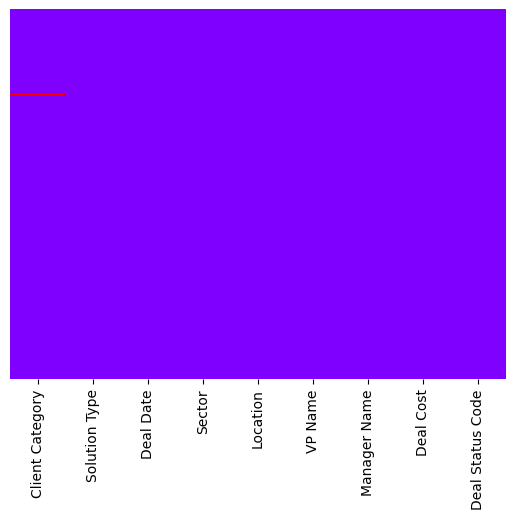

In [6]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar=False, cmap='rainbow')
plt.show()

In [7]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [8]:
# handling missing value
Client_Category = newdata['Client Category'].value_counts()

In [9]:
Client_Category

Client Category
Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce              

In [10]:
newdata['Client Category'] = newdata['Client Category'].fillna('Others')

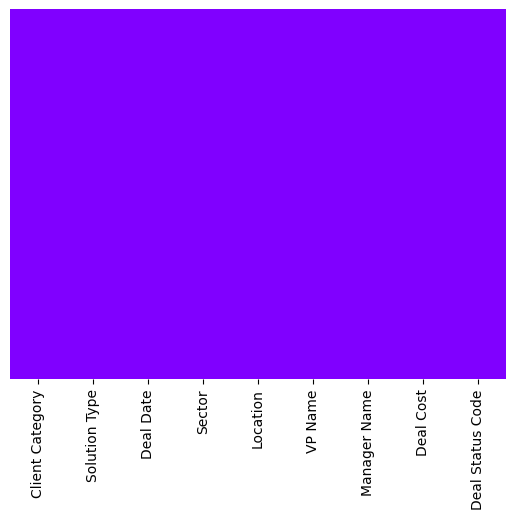

In [11]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar=False, cmap='rainbow')
plt.show()

In [12]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [13]:
# Describe the object data type 
sumcat = newdata.describe(include='O')
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [14]:
newdata['Deal Status Code'].value_counts()

Deal Status Code
Lost    6306
Won     3755
Name: count, dtype: int64

In [15]:
Client_Category_index = newdata['Client Category'].value_counts().index

In [16]:
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object', name='Client Category')

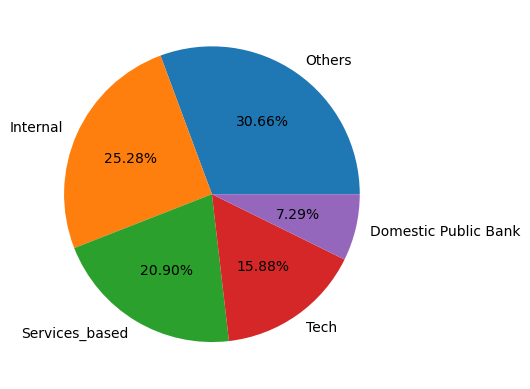

In [17]:
plt.pie(Client_Category[:5], labels=Client_Category_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

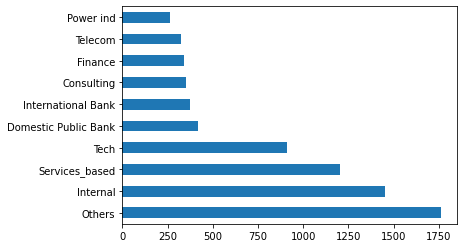

In [18]:
Client_Category[:10].plot(kind='barh')

In [19]:
VP_Name_index = newdata['VP Name'].value_counts().index

In [20]:
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Visvajeet Das',
       'Waylon Mulder', 'P. Somya', 'Kirk Hofmeister', 'Sarthak Batra',
       'md. afsar'],
      dtype='object')

In [21]:
VP_Name = newdata['VP Name'].value_counts()
VP_Name

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

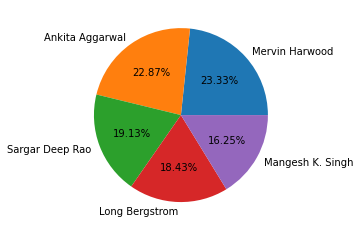

In [22]:
plt.pie(VP_Name[:5], labels=VP_Name_index[:5], autopct = '%1.2f%%')
plt.show()

In [23]:
# We have to check the relationship between independent variable vs Dep variables

In [24]:
newdata.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


In [25]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [26]:
rel_client_cat = newdata[['Client Category',
                     'Deal Status Code']].groupby(['Client Category',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [27]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status Code
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [28]:
Solution_Type_cat = newdata[['Solution Type',
                     'Deal Status Code']].groupby(['Solution Type',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [29]:
Solution_Type_cat

,Solution Type,Deal Status Code,Deal Status Code
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [30]:
VP_Name_cat = newdata[['VP Name',
                     'Deal Status Code']].groupby(['VP Name',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [31]:
VP_Name_cat.head(20)

,VP Name,Deal Status Code,Deal Status Code
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
5,Brendon Wycoff,Won,57
6,Clinton Mani,Lost,124
7,Clinton Mani,Won,60
8,Dennis Faux,Lost,12
9,Dennis Faux,Won,1


In [32]:
Manager_Name_cat = newdata[['Manager Name',
                     'Deal Status Code']].groupby(['Manager Name',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Total count'})

In [33]:
Manager_Name_cat

,Manager Name,Deal Status Code,Total count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [34]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [35]:
print(pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'Manager Name', values ='Deal Cost'))

Manager Name      Aastha Gandhi  Abhinav Warrier  Abhishek Singhal  \
Deal Status Code                                                     
Lost                        NaN    588808.824000     772860.963182   
Won                   242647.06    302235.296667     476956.522609   

Manager Name      Abhiskek Kumar   Abhiskhek  D    Abram Fines  Aditya Kumar  \
Deal Status Code                                                               
Lost               949894.957857  440767.973889  501764.706000     792647.06   
Won                587507.740789  375658.823600  714127.789655     250367.65   

Manager Name      Aditya Tondon   Ahdarsha Jha  Ahswini Saini  ...  \
Deal Status Code                                               ...   
Lost                 1058823.53  924866.311818     1029411.77  ...   
Won                         NaN  351102.940000      601470.59  ...   

Manager Name          shafibul  sharat chandran   sheak shakir  shiv kumar  \
Deal Status Code                       

In [36]:
pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'VP Name', values ='Deal Cost')

VP Name,Alam Syed,Ankita Aggarwal,Brendon Wycoff,Clinton Mani,Dennis Faux,Earline Langton,Ekta Zutshi,Gaurav Sameria,Gayle Molter,Gopa Trilochana,...,Saurabh Singh,Son Mcconnaughy,Varsha Arora,Vidur Hukle,Vikram Rawat,Visvajeet Das,Waylon Mulder,md. afsar,neeraj kumar,som dutt
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,1.087144e+06,654206.63000,1.096894e+06,776755.218548,554656.861667,1.189219e+06,7.912821e+05,554590.017879,7.291971e+05,1.464321e+06,...,761066.176429,1.517227e+06,7.272255e+05,615517.241724,1.681103e+06,1176470.59,235294.12,3235294.12,478943.956142,554650.469710
Won,1.172937e+06,503528.35065,1.909288e+06,600857.843500,315294.120000,6.034314e+05,1.021396e+06,586433.823958,1.282863e+06,8.195701e+05,...,962863.052187,5.470632e+05,3.454505e+06,540581.233095,5.161111e+05,5588235.29,88235.29,NaN,693700.190092,562977.044756


In [37]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [38]:
import datetime
newdata['Deal_Date_year'] = newdata['Deal Date'].dt.year

In [39]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


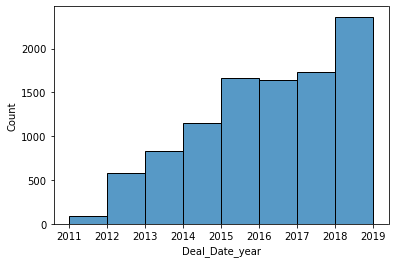

In [41]:
sns.histplot(newdata.Deal_Date_year, bins = 8)
plt.show()

In [42]:
newdata['Deal_Date_month'] = newdata['Deal Date'].dt.month

In [45]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


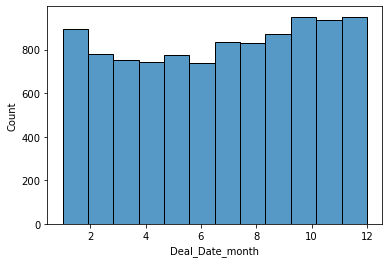

In [44]:
sns.histplot(newdata.Deal_Date_month, bins = 12)
plt.show()

In [46]:
newdata['Deal_Date_quarter'] = newdata['Deal Date'].dt.quarter

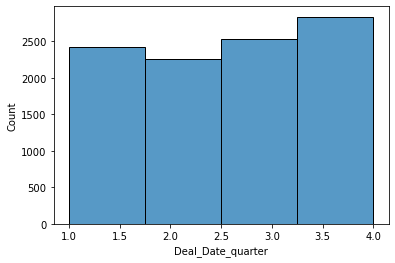

In [47]:
sns.histplot(newdata.Deal_Date_quarter, bins = 4)
plt.show()

<AxesSubplot:>

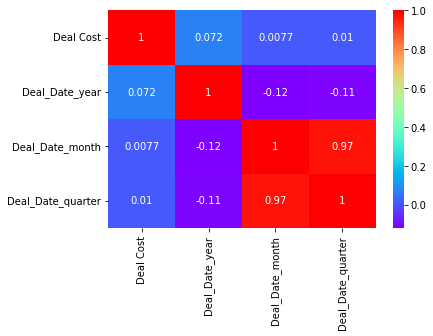

In [48]:
sns.heatmap(newdata.corr(), annot=True, cmap='rainbow')

In [49]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [50]:
newdata['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [53]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name', 'Deal Cost', 'Deal Status Code', 'Deal_Date_year',
       'Deal_Date_month', 'Deal_Date_quarter'],
      dtype='object')

In [52]:
newdata = newdata.drop(['Deal Date'], axis=1)

In [54]:
newdata['Client Category'] = newdata['Client Category'].astype('category')
newdata['Client Category'] = newdata['Client Category'].cat.codes

newdata['Solution Type'] = newdata['Solution Type'].astype('category')
newdata['Solution Type'] = newdata['Solution Type'].cat.codes

newdata['Sector'] = newdata['Sector'].astype('category')
newdata['Sector'] = newdata['Sector'].cat.codes

newdata['Location'] = newdata['Location'].astype('category')
newdata['Location'] = newdata['Location'].cat.codes

newdata['VP Name'] = newdata['VP Name'].astype('category')
newdata['VP Name'] = newdata['VP Name'].cat.codes

newdata['Manager Name'] = newdata['Manager Name'].astype('category')
newdata['Manager Name'] = newdata['Manager Name'].cat.codes

newdata['Deal Status Code'] = newdata['Deal Status Code'].astype('category')
newdata['Deal Status Code'] = newdata['Deal Status Code'].cat.codes

In [55]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


In [56]:
newdata = newdata.iloc[:,0:8]

In [57]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,39,64,16,7,6,82,150000.00,1
1,39,64,16,7,6,82,744705.88,1
2,19,54,12,12,6,183,60000.00,0
3,19,54,12,12,6,183,60000.00,0
4,19,25,12,12,6,183,80882.35,0


In [60]:
# split the data into x and y
x = newdata.iloc[:,0:-1].values
y = newdata['Deal Status Code'].values

In [62]:
x

array([[3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 1.50000000e+05],
       [3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 7.44705880e+05],
       [1.90000000e+01, 5.40000000e+01, 1.20000000e+01, ...,
        6.00000000e+00, 1.83000000e+02, 6.00000000e+04],
       ...,
       [3.10000000e+01, 6.60000000e+01, 2.40000000e+01, ...,
        2.90000000e+01, 1.82000000e+02, 5.88235290e+05],
       [3.10000000e+01, 5.80000000e+01, 2.40000000e+01, ...,
        1.90000000e+01, 5.00000000e+01, 3.04205882e+06],
       [2.80000000e+01, 6.60000000e+01, 3.00000000e+00, ...,
        3.40000000e+01, 2.16000000e+02, 1.47058820e+05]])

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [65]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

In [67]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.70, random_state=101)

# Deep Neural Network

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
# Architecture - Sequential / Functional

dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
221/221 [==============================] - 7s 4ms/step - loss: 0.6651 - accuracy: 0.6170
Epoch 2/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6569 - accuracy: 0.6179
Epoch 3/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6509 - accuracy: 0.6199
Epoch 4/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6470 - accuracy: 0.6275
Epoch 5/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6435 - accuracy: 0.6302
Epoch 6/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6408 - accuracy: 0.6423
Epoch 7/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6375 - accuracy: 0.6481
Epoch 8/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6344 - accuracy: 0.6535
Epoch 9/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6312 - accuracy: 0.6534
Epoch 10/100
221/221 [==============================] - 1s 4ms/step - loss: 0.6278 - accura

In [70]:
dnn.fit(x_train, y_train, batch_size=32, epochs=25)

Epoch 1/25
221/221 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7467
Epoch 2/25
221/221 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7420
Epoch 3/25
221/221 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.7448
Epoch 4/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5134 - accuracy: 0.7441
Epoch 5/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5174 - accuracy: 0.7423
Epoch 6/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5127 - accuracy: 0.7479
Epoch 7/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5127 - accuracy: 0.7440
Epoch 8/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5128 - accuracy: 0.7467
Epoch 9/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5117 - accuracy: 0.7495
Epoch 10/25
221/221 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7488

In [71]:
y_pred = dnn.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

95/95 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [73]:
print(confusion_matrix(y_test, y_pred))

[[1583  372]
 [ 630  434]]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1955
           1       0.54      0.41      0.46      1064

    accuracy                           0.67      3019
   macro avg       0.63      0.61      0.61      3019
weighted avg       0.65      0.67      0.66      3019



In [75]:
print(accuracy_score(y_test, y_pred))

0.6681020205366015
